# Data Exploration

## Load Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
df = pd.read_csv('data/kc_house_data.csv')

# check the columns and first few rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Explore the Data

In [2]:
# get the total counts and data types for each column
print(df.shape)
print("\n")
df.info()

(21597, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float

In [3]:
# Get descriptions of each column
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# look for duplicates
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicates: ", len(duplicate_rows_df))

Number of duplicates:  0


In [5]:
# preview 5 most frequent values of a col in a loop, for each string col.
# looking for extraneous values and getting to know the data
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
    print('\n')

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

In [6]:
# replace extraneous value '?' in 'sqft_basement' col to equal 0 as that is mode
# convert to type to float
df.sqft_basement = df.sqft_basement.map(lambda x: '0' if x == '?' else x)
df.sqft_basement = df.sqft_basement.astype('float')

In [7]:
# see results
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [8]:
# check for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Scrub the Data

In [9]:
# analyze waterfront column
print(df['waterfront'].value_counts())

0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [10]:
# values are either yes (1.0) or no (0.0)
# since the cells are blank, it is best to assume that the houses do not have a waterfront view
# the empty cells should be filled with 0.0
df['waterfront'].fillna(0, inplace=True)
print(df.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [11]:
# how much is missing from year renovated - 18%
# printed most common values so that we know what to replace the nulls with
print('Percentage of Null yr_renovated Values:', len(df[df.yr_renovated.isna()])/ len(df))
print('Number of Unique yr_renovated Values:', df.yr_renovated.nunique())
print('Number of Unique Values:', df.yr_renovated.value_counts())

Percentage of Null yr_renovated Values: 0.17789507802009538
Number of Unique yr_renovated Values: 70
Number of Unique Values: 0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [12]:
# 0.0 is the mode
# a number equals the year the home was renovated and 0.0 means the home was never renovated
# we should then also assume that the blank cells mean that these homes were never renovated
# convert nan to 0.0
df.loc[df.yr_renovated.isna(), 'yr_renovated'] = 0.0

In [13]:
# see results
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [14]:
# analyze view column
print(df['view'].value_counts())

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [15]:
views_mean = df['view'].mean()
views_median = df['view'].median()
views_mode = df['view'].mode()
print('Viewed Mean: ', views_mean)
print('Viewed Median: ', views_median)
print('Viewed Mode: ', views_mode)

Viewed Mean:  0.23386272870808952
Viewed Median:  0.0
Viewed Mode:  0    0.0
dtype: float64


In [16]:
# both the median and mode are 0.0
# the mean rounded to the nearest whole number is also 0.0
# it is best to assume the cells were left blank because they were not viewed
# the blank num_views cells should be changed to 0.0
df['view'] = df['view'].fillna(0.0)
print(df['view'].value_counts())

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [17]:
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [18]:
# see if all null values are filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [19]:
# Converting date to datetime
df.date = pd.to_datetime(df.date)

## EDA with Visualizations

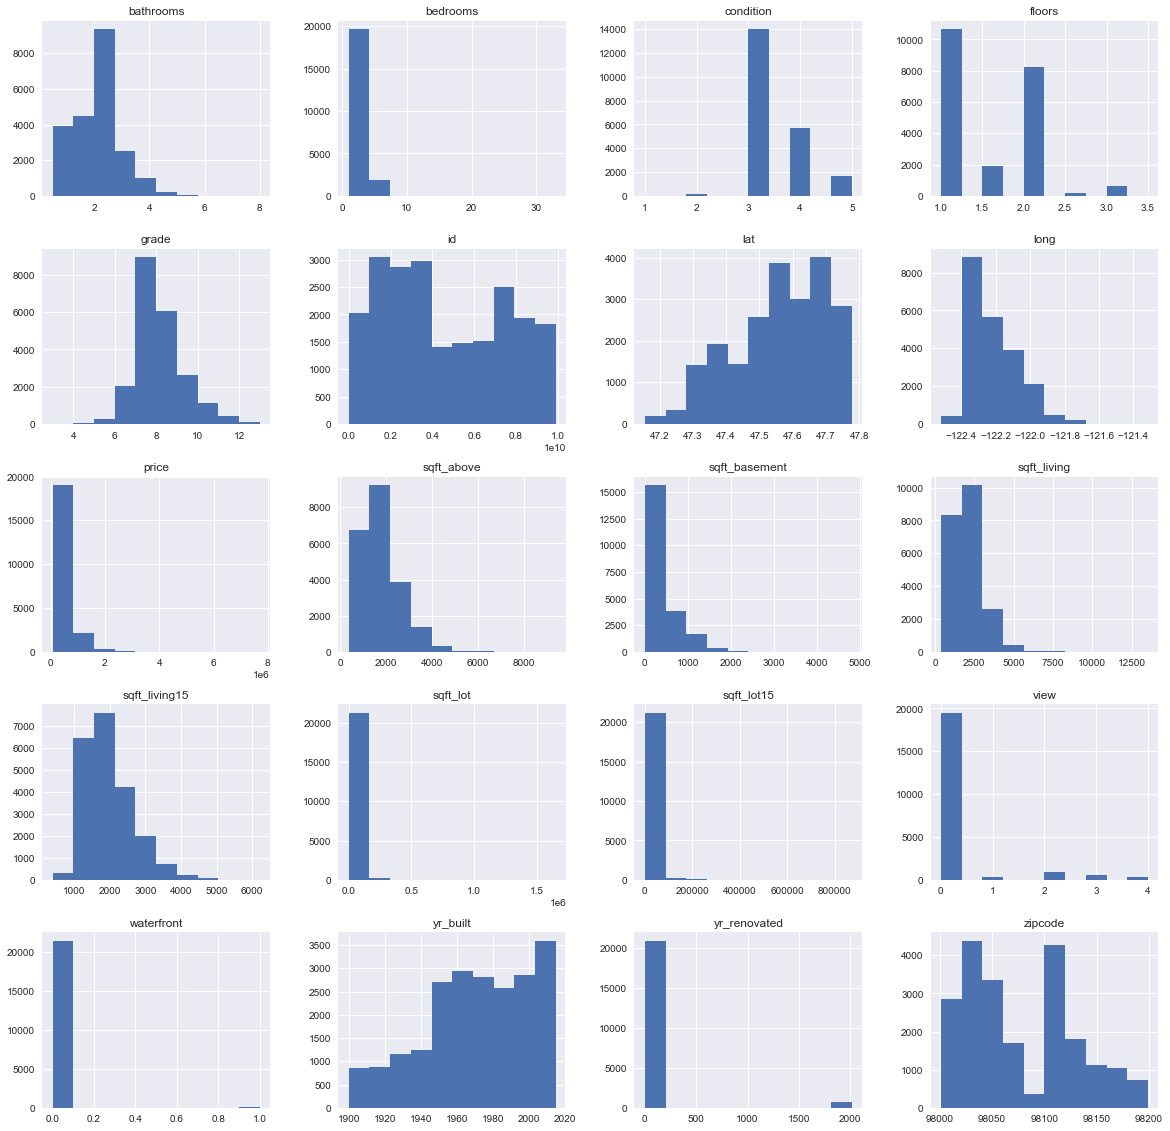

In [20]:
#look at distributions of each column
df.hist(figsize=(20,20));

## Drop Unnecessary Columns

In [21]:
drop_vars = ['id', 'date', 'zipcode',]
df.drop(columns=drop_vars, axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503


## Removing Outliers

In [22]:
# after looking over the data, major outliers were only found in the bathrooms and bedrooms columns

### Dependant Variable - Price

In [23]:
from numpy import mean
from numpy import std

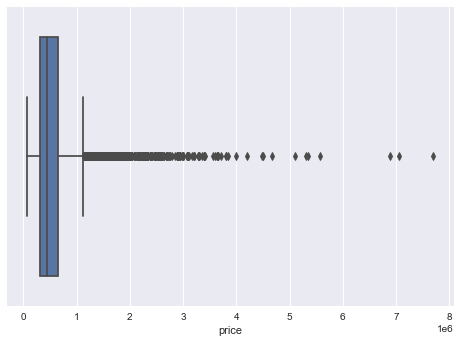

In [24]:
sns.boxplot(x=df['price'])

In [25]:
# calculate summary statistics
data_mean, data_std = mean(df.price), std(df.price)
# identify outliers
cut_off = data_std * 1
lower, upper = data_mean - cut_off, data_mean + cut_off

In [26]:
# identify outliers
outliers = [x for x in df.price if x < lower or x > upper]

In [27]:
sorted(outliers)

[78000.0,
 80000.0,
 81000.0,
 82000.0,
 82500.0,
 83000.0,
 84000.0,
 85000.0,
 85000.0,
 86500.0,
 89000.0,
 89950.0,
 90000.0,
 90000.0,
 90000.0,
 90000.0,
 90000.0,
 92000.0,
 95000.0,
 95000.0,
 95000.0,
 95000.0,
 96500.0,
 99000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 100000.0,
 102500.0,
 104950.0,
 105000.0,
 105000.0,
 105500.0,
 106000.0,
 107000.0,
 107000.0,
 109000.0,
 109500.0,
 110000.0,
 110000.0,
 110000.0,
 110000.0,
 110000.0,
 110000.0,
 110000.0,
 110000.0,
 110700.0,
 111300.0,
 112000.0,
 114000.0,
 114975.0,
 115000.0,
 115000.0,
 115000.0,
 115000.0,
 115000.0,
 115000.0,
 115000.0,
 118000.0,
 118125.0,
 119500.0,
 119900.0,
 120000.0,
 120000.0,
 120000.0,
 120750.0,
 121800.0,
 122000.0,
 122000.0,
 122000.0,
 122000.0,
 123000.0,
 123300.0,
 124000.0,
 124000.0,
 124500.0,
 124740.0,
 125000.0,
 125000.0,
 125000.0,
 125000.0,
 125000.0,
 126000.0,
 126500.0,
 128000.0,
 128000.0,
 128000.0,
 128750.0,
 129000.0,
 129000.0,
 129000.0,
 

In [28]:
#subset price to eliminate outliers 
df = df[df.price > 172500]
df = df[df.price < 907687]

### Number of Bedrooms

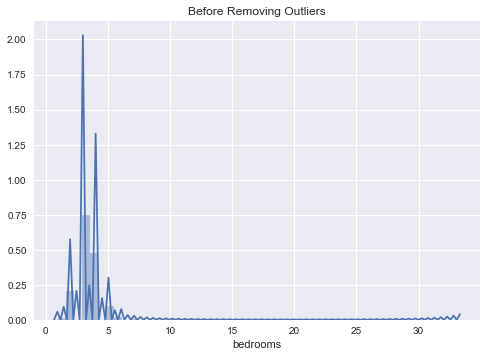

In [29]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['bedrooms'])
plt.show();

In [30]:
# remove outliers
count = 0
bed_outliers = []
mean = np.mean(df['bedrooms'])
max_distance = np.std(df['bedrooms']) * 2

for idx, row in df['bedrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx,inplace=True)
count

417

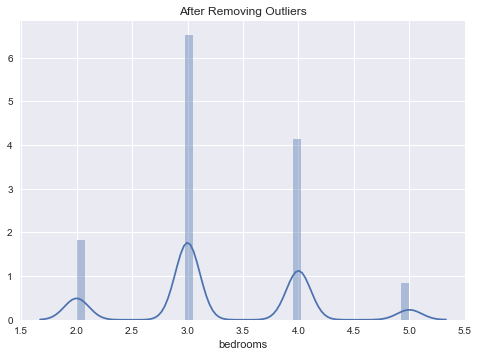

In [31]:
plt.title('After Removing Outliers')
sns.distplot(df['bedrooms'])
plt.show();

### Number of Bathrooms

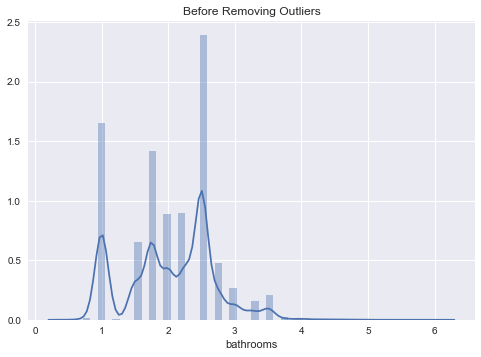

In [32]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['bathrooms'])
plt.show();

In [33]:
# remove outliers
count = 0
bath_outliers = []
mean = np.mean(df['bathrooms'])
max_distance = np.std(df['bathrooms']) * 3

for idx, row in df['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx, inplace=True)
count

32

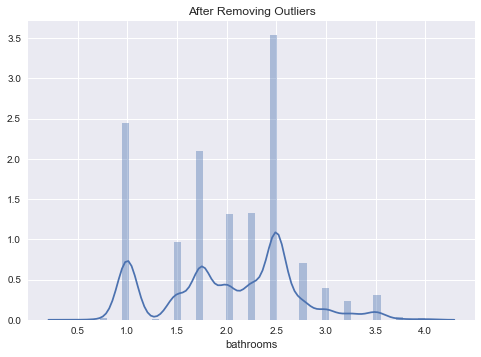

In [34]:
plt.title('After Removing Outliers')
sns.distplot(df['bathrooms'])
plt.show();

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18756 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18756 non-null  float64
 1   bedrooms       18756 non-null  int64  
 2   bathrooms      18756 non-null  float64
 3   sqft_living    18756 non-null  int64  
 4   sqft_lot       18756 non-null  int64  
 5   floors         18756 non-null  float64
 6   waterfront     18756 non-null  float64
 7   view           18756 non-null  float64
 8   condition      18756 non-null  int64  
 9   grade          18756 non-null  int64  
 10  sqft_above     18756 non-null  int64  
 11  sqft_basement  18756 non-null  float64
 12  yr_built       18756 non-null  int64  
 13  yr_renovated   18756 non-null  float64
 14  lat            18756 non-null  float64
 15  long           18756 non-null  float64
 16  sqft_living15  18756 non-null  int64  
 17  sqft_lot15     18756 non-null  int64  
dtypes: flo

In [36]:
# sqft_living equals sqft_above and sqft_basement so we will drop those columns
df = df.drop(['sqft_above', 'sqft_basement'], axis=1)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,18756.000000,18756.000000,18756.000000,18756.000000,1.875600e+04,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000
mean,459943.715238,3.299371,2.029324,1933.314353,1.426777e+04,1.472036,0.001973,0.149392,3.408403,7.496694,1971.388356,55.951216,47.556132,-122.212101,1897.801663,12273.137449
std,177018.381080,0.780529,0.661380,703.227584,3.888059e+04,0.537953,0.044372,0.589945,0.641564,0.952254,28.909529,329.410061,0.142720,0.142469,575.999134,25712.594993
min,173000.000000,2.000000,0.500000,440.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,317000.000000,3.000000,1.500000,1403.750000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1952.000000,0.000000,47.455800,-122.330000,1470.000000,5024.000000
50%,430000.000000,3.000000,2.000000,1830.000000,7.482000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,47.565950,-122.230000,1790.000000,7506.000000
75%,579000.000000,4.000000,2.500000,2370.000000,1.018225e+04,2.000000,0.000000,0.000000,4.000000,8.000000,1996.000000,0.000000,47.681925,-122.120000,2240.000000,9768.250000
max,907500.000000,5.000000,4.000000,5461.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,11.000000,2015.000000,2015.000000,47.777600,-121.319000,4670.000000,560617.000000


# Linear Regression

## Model 1

In [37]:
# import libraries
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model

In [38]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
          'yr_built', 'yr_renovated', 'condition', 'grade', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model1 = smf.ols(formula=f, data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     2452.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:25:32   Log-Likelihood:            -2.4308e+05
No. Observations:               18756   AIC:                         4.862e+05
Df Residuals:                   18740   BIC:                         4.863e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.911e+07    8.4e+05    -22.746      0.000   -2.08e+07   -1.75e+07
bedrooms      -9967.3929   1233.711     -8.079      0.000   -1.24e+04   -7549.208
bathrooms      2.377e+04   1881.345     12.636      0.000    2.01e+04    2.75e+04
sqft_living      62.0581      2.113     29.374      0.000      57.917      66.199
sqft_lot          0.2103      0.028      7.629      0.000       0.156       0.264
floors         2.917e+04   1785.966     16.335      0.000    2.57e+04    3.27e+04
waterfront     1.164e+05   1.76e+04      6.607      0.000    8.19e+04    1.51e+05
view           2.429e+04   1370.703     17.722      0.000    2.16e+04     2.7e+04
yr_built      -1649.6735     41.305    -39.939      0.000   -1730.635   -1568.712
yr_renovated     12.0698      2.388      5.054      0.000       7.389      16.751
condition      2.325e+04   1298.880     17.900      0.000    2.07e+04    2.58e+04
grade          6.605e+04   1258.127     52.497      0.000    6.36e+04    6.85e+04
lat            5.055e+05   5539.636     91.244      0.000    4.95e+05    5.16e+05
long            1.69e+04   6343.795      2.664      0.008    4466.738    2.93e+04
sqft_living15    45.9630      2.100     21.886      0.000      41.847      50.079
sqft_lot15       -0.0496      0.042     -1.178      0.239      -0.132       0.033
==============================================================================
Omnibus:                      860.808   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1210.115
Skew:                           0.442   Prob(JB):                    1.69e-263
Kurtosis:                       3.876   Cond. No.                     5.31e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-39-5b3721209eff>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


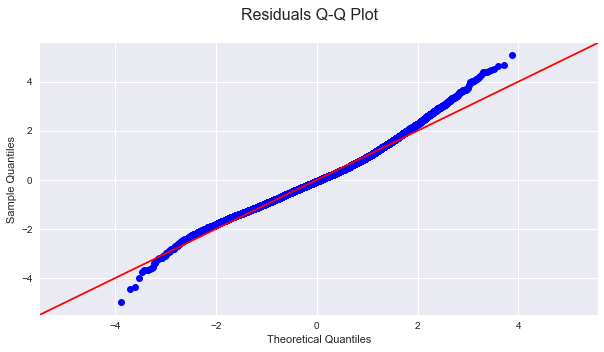

In [39]:
# qq plot
residuals = model1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

In [40]:
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(model1.resid)/ len(model1.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

The mean of the residuals is -1.341e-08


## Location Variables

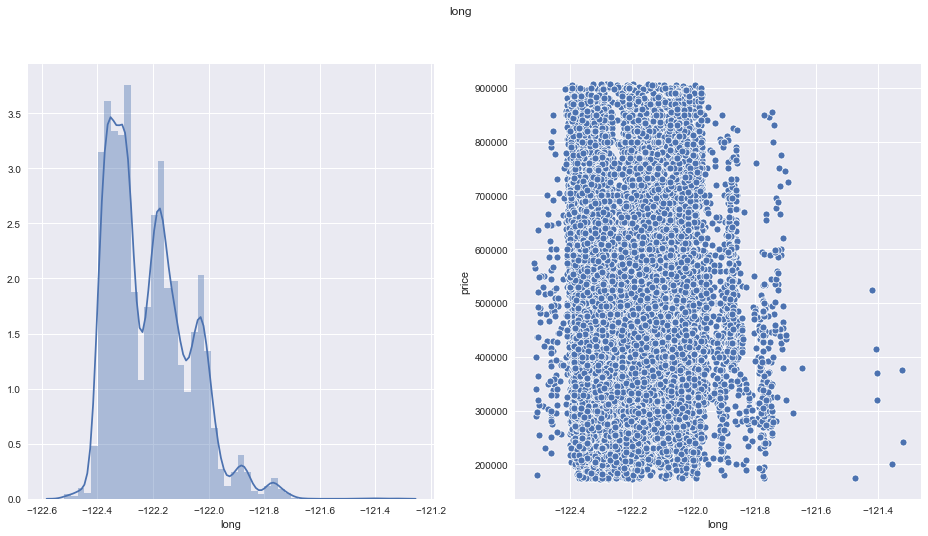

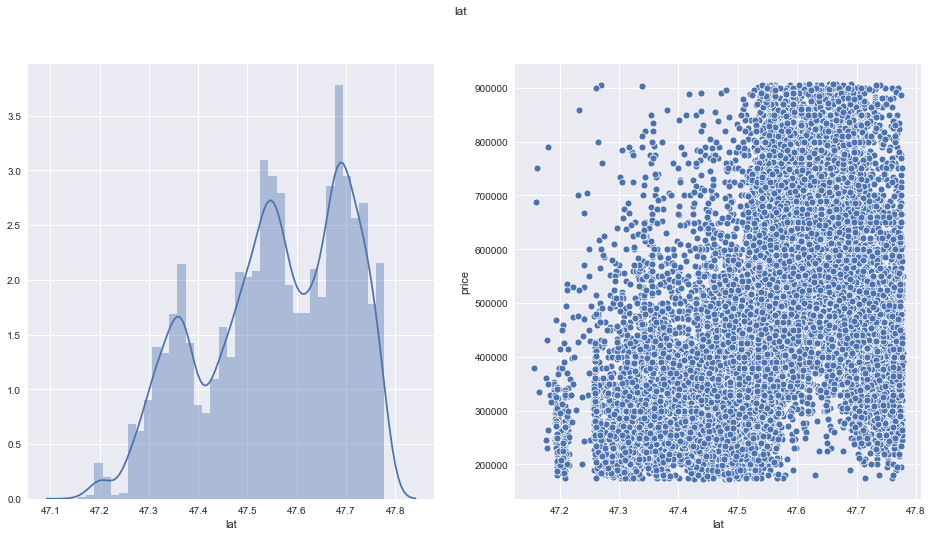

In [41]:
target = df['price'].copy()
location = df[['long', 'lat']].copy()

for col in location:
    x = location[col]
    y = target

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    sns.distplot(x)
    plt.subplot(1,2,2)

    sns.scatterplot(x, y)
    plt.suptitle(col)
    plt.tight_layout

In [42]:
location.head()

,long,lat
0,-122.257,47.5112
1,-122.319,47.7210
2,-122.233,47.7379
3,-122.393,47.5208
4,-122.045,47.6168


In [43]:
location['long_lat'] = list(zip(location['long'], location['lat']))
location.head()

,long,lat,long_lat
0,-122.257,47.5112,"(-122.257, 47.5112)"
1,-122.319,47.7210,"(-122.319, 47.721000000000004)"
2,-122.233,47.7379,"(-122.23299999999999, 47.7379)"
3,-122.393,47.5208,"(-122.39299999999999, 47.5208)"
4,-122.045,47.6168,"(-122.045, 47.6168)"


In [44]:
# calculate distance from point A to Seattle using haversine
from math import radians, cos, sin, asin, sqrt

def haversine(list_long_lat, other=[-122.336283, 47.609395]):

    lon1, lat1 = list_long_lat[0], list_long_lat[1]
    lon2, lat2 = other[0], other[1]
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # radius of earth in kilometers is 6371
    km = 6371 * c
    return km

In [45]:
location['dist_to_seattle'] = location['long_lat'].apply(haversine)

In [46]:
# add bellevue to locations
location['dist_to_bellevue'] = location['long_lat'].apply(haversine, other=[-122.198985, 47.615577])

In [47]:
feat_engineer = location.loc[:,['dist_to_seattle', 'dist_to_bellevue']]

In [48]:
feat_engineer.head()

,dist_to_seattle,dist_to_bellevue
0,12.434278,12.395639
1,12.477217,14.770934
2,16.247460,13.838051
3,10.731122,17.970486
4,21.850148,11.542868


In [49]:
# drop the original lat and long columns and join the feature engineered columns
df.drop(['lat', 'long'], axis=1)
df['dist_to_seattle'] = feat_engineer['dist_to_seattle']
df['dist_to_bellevue'] = feat_engineer['dist_to_bellevue']
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,dist_to_seattle,dist_to_bellevue
count,18756.000000,18756.000000,18756.000000,18756.000000,1.875600e+04,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000,18756.000000
mean,459943.715238,3.299371,2.029324,1933.314353,1.426777e+04,1.472036,0.001973,0.149392,3.408403,7.496694,1971.388356,55.951216,47.556132,-122.212101,1897.801663,12273.137449,19.252791,18.076645
std,177018.381080,0.780529,0.661380,703.227584,3.888059e+04,0.537953,0.044372,0.589945,0.641564,0.952254,28.909529,329.410061,0.142720,0.142469,575.999134,25712.594993,10.829385,9.160153
min,173000.000000,2.000000,0.500000,440.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,1.355938,0.662987
25%,317000.000000,3.000000,1.500000,1403.750000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1952.000000,0.000000,47.455800,-122.330000,1470.000000,5024.000000,10.173790,11.993588
50%,430000.000000,3.000000,2.000000,1830.000000,7.482000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,47.565950,-122.230000,1790.000000,7506.000000,17.320462,15.624230
75%,579000.000000,4.000000,2.500000,2370.000000,1.018225e+04,2.000000,0.000000,0.000000,4.000000,8.000000,1996.000000,0.000000,47.681925,-122.120000,2240.000000,9768.250000,26.273090,22.396363
max,907500.000000,5.000000,4.000000,5461.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,11.000000,2015.000000,2015.000000,47.777600,-121.319000,4670.000000,560617.000000,77.052704,66.785097


## Dealing with Categorical Features

In [50]:
# creating column "class_scale" based on condition of price
df.loc[df['price'] > 700000, 'class_scale'] = "upper"
df.loc[(df['price'] < 700000) & (df['price'] > 300000), 'class_scale'] = "middle"
df.loc[df['price'] < 300000, 'class_scale'] = "lower"

In [51]:
grouped = df.groupby(['class_scale'])['price', 'grade'].agg(['mean','min', 'max', 'std']).round()
grouped.head()

<ipython-input-51-2c9d313e0316>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = df.groupby(['class_scale'])['price', 'grade'].agg(['mean','min', 'max', 'std']).round()


price                               grade             
                 mean       min       max       std  mean min max  std
class_scale                                                           
lower        247905.0  173000.0  299999.0   33004.0   7.0   4   9  1.0
middle       467953.0  300499.0  699999.0  108218.0   8.0   4  11  1.0
upper        790891.0  700180.0  907500.0   56888.0   9.0   5  11  1.0

In [52]:
df.class_scale.value_counts(normalize=True)

middle    0.666235
lower     0.213288
upper     0.120477
Name: class_scale, dtype: float64

In [53]:
grade_dummies = pd.get_dummies(df['grade'], prefix='gr', drop_first=True)
condition_dummies = pd.get_dummies(df['condition'], prefix='condit', drop_first=True)
class_dummies = pd.get_dummies(df['class_scale'], prefix='class', drop_first=True)

In [54]:
df = df.drop(['grade', 'condition', 'class_scale'], axis=1)
df = pd.concat([df, grade_dummies, condition_dummies, class_dummies], axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,yr_built,yr_renovated,...,gr_8,gr_9,gr_10,gr_11,condit_2,condit_3,condit_4,condit_5,class_middle,class_upper
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,1955,0.0,...,0,0,0,0,0,1,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,1951,1991.0,...,0,0,0,0,0,1,0,0,1,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,1933,0.0,...,0,0,0,0,0,1,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,1965,0.0,...,0,0,0,0,0,0,0,1,1,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,1987,0.0,...,1,0,0,0,0,1,0,0,1,0


In [55]:
drop_cols = ['waterfront','view','yr_renovated', 'yr_built']
df.drop(drop_cols, axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,lat,long,sqft_living15,sqft_lot15,...,gr_8,gr_9,gr_10,gr_11,condit_2,condit_3,condit_4,condit_5,class_middle,class_upper
0,221900.0,3,1.00,1180,5650,1.0,47.5112,-122.257,1340,5650,...,0,0,0,0,0,1,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,47.7210,-122.319,1690,7639,...,0,0,0,0,0,1,0,0,1,0
2,180000.0,2,1.00,770,10000,1.0,47.7379,-122.233,2720,8062,...,0,0,0,0,0,1,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,47.5208,-122.393,1360,5000,...,0,0,0,0,0,0,0,1,1,0
4,510000.0,3,2.00,1680,8080,1.0,47.6168,-122.045,1800,7503,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,47.6993,-122.346,1530,1509,...,1,0,0,0,0,1,0,0,1,0
21593,400000.0,4,2.50,2310,5813,2.0,47.5107,-122.362,1830,7200,...,1,0,0,0,0,1,0,0,1,0
21594,402101.0,2,0.75,1020,1350,2.0,47.5944,-122.299,1020,2007,...,0,0,0,0,0,1,0,0,1,0
21595,400000.0,3,2.50,1600,2388,2.0,47.5345,-122.069,1410,1287,...,1,0,0,0,0,1,0,0,1,0


## Model 2

In [56]:
#Greatly increased our r-squared by incorporating our categorical features through one-hot encoding:
#    - Distance to cities (Seattle and Bellevue)
#    - Condition (1 - 5 scale)
#    - Grade (3 - 13 scale)
#    - Class (upper, middle, lower)

In [57]:
# try the model with the new columns
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
          'dist_to_seattle', 'dist_to_bellevue', 'sqft_living15', 'sqft_lot15', 'gr_5', 'gr_6', 
          'gr_7', 'gr_8','gr_9', 'gr_10', 'gr_11', 'condit_2', 'condit_3', 'condit_4', 'condit_5', 
          'class_middle', 'class_upper']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model2 = smf.ols(formula=f, data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     3223.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:25:37   Log-Likelihood:            -2.3793e+05
No. Observations:               18756   AIC:                         4.759e+05
Df Residuals:                   18731   BIC:                         4.761e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.585e+05   3.38e+04      7.657      0.000    1.92e+05    3.25e+05
bedrooms         -7085.2506    944.175     -7.504      0.000   -8935.919   -5234.582
bathrooms         1013.5685   1361.241      0.745      0.457   -1654.588    3681.725
sqft_living         42.8930      1.630     26.312      0.000      39.698      46.088
sqft_lot             0.2082      0.021      9.913      0.000       0.167       0.249
floors            3103.6958   1342.698      2.312      0.021     471.885    5735.506
waterfront        7.308e+04   1.34e+04      5.457      0.000    4.68e+04    9.93e+04
view              1.356e+04   1050.660     12.908      0.000    1.15e+04    1.56e+04
dist_to_seattle  -1567.1809    114.515    -13.685      0.000   -1791.640   -1342.722
dist_to_bellevue -3773.2476    131.195    -28.761      0.000   -4030.403   -3516.093
sqft_living15       23.5747      1.649     14.294      0.000      20.342      26.807
sqft_lot15           0.1635      0.032      5.082      0.000       0.100       0.227
gr_5             -4574.4756   2.84e+04     -0.161      0.872   -6.02e+04    5.11e+04
gr_6             -6309.5260   2.77e+04     -0.227      0.820   -6.07e+04    4.81e+04
gr_7              2.431e+04   2.77e+04      0.877      0.380      -3e+04    7.86e+04
gr_8              5.911e+04   2.78e+04      2.130      0.033    4712.207    1.13e+05
gr_9              9.111e+04   2.78e+04      3.273      0.001    3.65e+04    1.46e+05
gr_10              8.88e+04   2.81e+04      3.166      0.002    3.38e+04    1.44e+05
gr_11             9.213e+04   3.03e+04      3.043      0.002    3.28e+04    1.51e+05
condit_2         -5171.6992   2.03e+04     -0.255      0.799   -4.49e+04    3.46e+04
condit_3          1.634e+04   1.91e+04      0.856      0.392   -2.11e+04    5.38e+04
condit_4          3.305e+04   1.91e+04      1.730      0.084   -4391.078    7.05e+04
condit_5          5.428e+04   1.92e+04      2.829      0.005    1.67e+04    9.19e+04
class_middle       1.17e+05   1722.127     67.962      0.000    1.14e+05     1.2e+05
class_upper       3.392e+05   2861.900    118.539      0.000    3.34e+05    3.45e+05
==============================================================================
Omnibus:                      739.184   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              850.539
Skew:                           0.476   Prob(JB):                    2.03e-185
Kurtosis:                       3.425   Cond. No.                     6.57e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+06. This might indicate that there are
strong multicollinearity or other numerical pr

<ipython-input-58-370b3596e1db>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


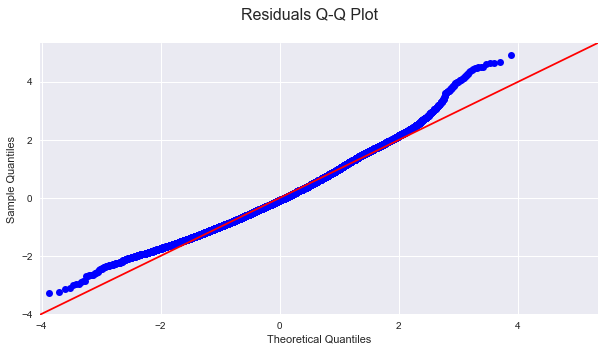

In [58]:
# qq plot
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

In [59]:
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(model2.resid)/ len(model2.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

The mean of the residuals is -5.153e-09


## Checking Assumptions

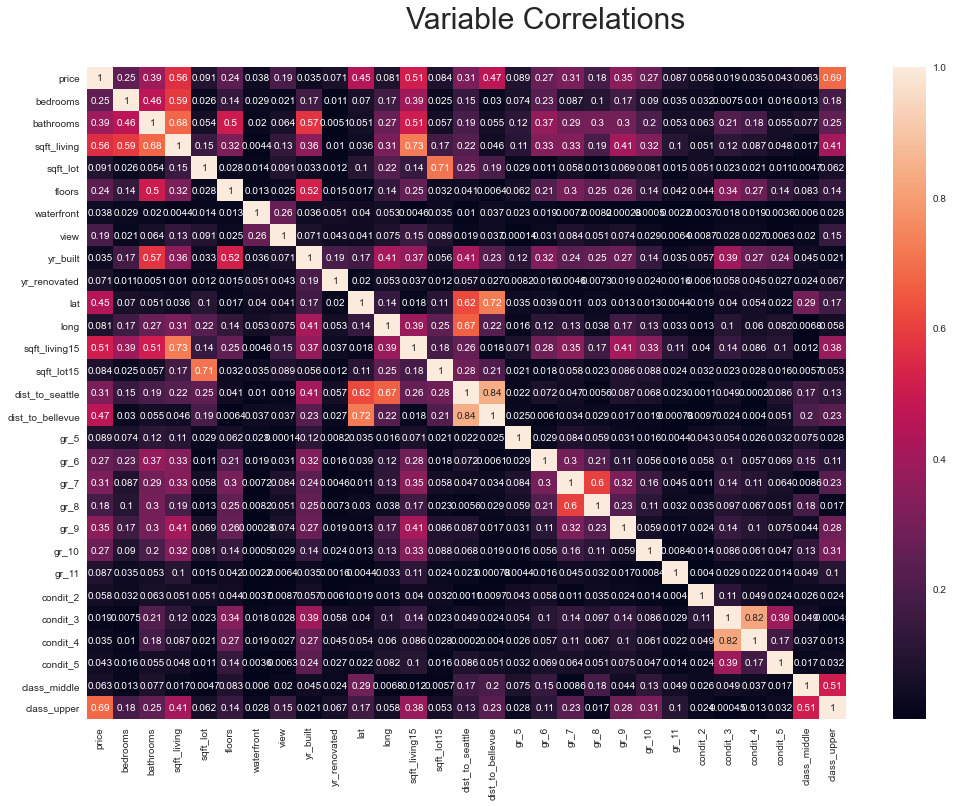

In [60]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, annot=True)
heatmap

In [61]:
# the heatmap does not provide much
# create functions to find any multicollinearity issues
# find the columns with the most correlations to the dependant variable
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [62]:
# usually any variables that correlate more than 80% have multicollinearity
# one of those columns will need to be dropped
multicollinear_features = []
multicollinear_corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .80 and idx != feature:
            multicollinear_features.append([feature, idx])
            multicollinear_corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':multicollinear_corr, 'Features': multicollinear_features})
print('Multicollinear Features')
display(MC_df)

Multicollinear Features


,Correlations,Features
0,0.842013,"[dist_to_seattle, dist_to_bellevue]"
1,0.842013,"[dist_to_bellevue, dist_to_seattle]"
2,0.821824,"[condit_3, condit_4]"
3,0.821824,"[condit_4, condit_3]"


In [63]:
print('Correlations with Price')
display(corr_price_df)

Correlations with Price


,Correlations,Features
8,0.687483,class_upper
1,0.558935,sqft_living
3,0.513610,sqft_living15
5,0.465339,dist_to_bellevue
2,0.448687,lat
0,0.388373,bathrooms
7,0.350904,gr_9
6,0.311753,gr_7
4,0.309123,dist_to_seattle


## Create Interactions

In [64]:
# this increased the r-squared slightly
df['interaction_dist'] = df['dist_to_bellevue'] * df['dist_to_seattle']

## Model 3

In [65]:
# replace variables with interactions and drop condit_3
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
          'sqft_living15', 'sqft_lot15', 'gr_5', 'gr_6', 'gr_7', 'gr_8','gr_9', 'gr_10', 'gr_11', 
          'condit_2', 'condit_4', 'condit_5', 'class_middle', 'class_upper', 'interaction_dist']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model3 = smf.ols(formula=f, data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     3205.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:25:42   Log-Likelihood:            -2.3862e+05
No. Observations:               18756   AIC:                         4.773e+05
Df Residuals:                   18733   BIC:                         4.775e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.098e+05   2.89e+04      7.265      0.000    1.53e+05    2.66e+05
bedrooms         -6724.4467    978.638     -6.871      0.000   -8642.665   -4806.228
bathrooms           16.5383   1408.359      0.012      0.991   -2743.972    2777.049
sqft_living         38.2466      1.686     22.687      0.000      34.942      41.551
sqft_lot             0.1948      0.022      8.943      0.000       0.152       0.238
floors            2918.9160   1387.989      2.103      0.035     198.331    5639.501
waterfront        5.271e+04   1.39e+04      3.798      0.000    2.55e+04    7.99e+04
view              1.321e+04   1070.313     12.346      0.000    1.11e+04    1.53e+04
sqft_living15       21.4954      1.630     13.190      0.000      18.301      24.690
sqft_lot15           0.1167      0.033      3.502      0.000       0.051       0.182
gr_5               630.5403   2.94e+04      0.021      0.983   -5.71e+04    5.83e+04
gr_6               622.6172   2.88e+04      0.022      0.983   -5.58e+04     5.7e+04
gr_7               3.03e+04   2.87e+04      1.054      0.292    -2.6e+04    8.66e+04
gr_8              6.533e+04   2.88e+04      2.270      0.023    8910.358    1.22e+05
gr_9               9.76e+04   2.89e+04      3.380      0.001     4.1e+04    1.54e+05
gr_10             9.345e+04   2.91e+04      3.211      0.001    3.64e+04     1.5e+05
gr_11             9.355e+04   3.14e+04      2.979      0.003     3.2e+04    1.55e+05
condit_2         -1.958e+04   7318.957     -2.675      0.007   -3.39e+04   -5234.498
condit_4          1.724e+04   1446.459     11.919      0.000    1.44e+04    2.01e+04
condit_5          3.997e+04   2363.536     16.912      0.000    3.53e+04    4.46e+04
class_middle      1.313e+05   1744.807     75.257      0.000    1.28e+05    1.35e+05
class_upper       3.672e+05   2869.422    127.964      0.000    3.62e+05    3.73e+05
interaction_dist   -87.0239      1.512    -57.548      0.000     -89.988     -84.060
==============================================================================
Omnibus:                      977.122   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1184.337
Skew:                           0.547   Prob(JB):                    6.67e-258
Kurtosis:                       3.565   Cond. No.                     6.53e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-66-fb0070ecdd81>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


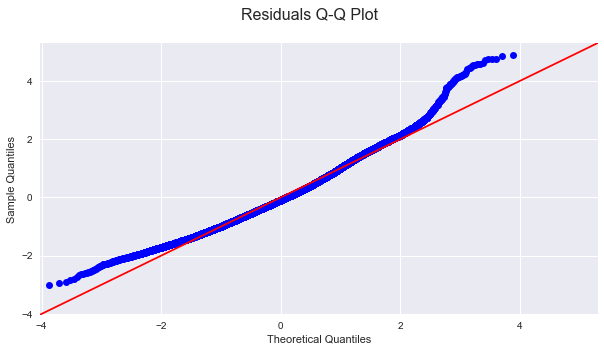

In [66]:
# qq plot
residuals = model3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

In [67]:
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(model3.resid)/ len(model3.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

The mean of the residuals is -1.804e-07


## Normalize Features

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18756 entries, 0 to 21596
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             18756 non-null  float64
 1   bedrooms          18756 non-null  int64  
 2   bathrooms         18756 non-null  float64
 3   sqft_living       18756 non-null  int64  
 4   sqft_lot          18756 non-null  int64  
 5   floors            18756 non-null  float64
 6   waterfront        18756 non-null  float64
 7   view              18756 non-null  float64
 8   yr_built          18756 non-null  int64  
 9   yr_renovated      18756 non-null  float64
 10  lat               18756 non-null  float64
 11  long              18756 non-null  float64
 12  sqft_living15     18756 non-null  int64  
 13  sqft_lot15        18756 non-null  int64  
 14  dist_to_seattle   18756 non-null  float64
 15  dist_to_bellevue  18756 non-null  float64
 16  gr_5              18756 non-null  uint8 

In [69]:
df['price'] = np.log(df['price'])
df['sqft_living'] = np.log(df['sqft_living'])
df['sqft_lot'] = np.log(df['sqft_lot'])
df['floors'] = np.log(df['floors'])
df['sqft_living15'] = np.log(df['sqft_living15'])
df['sqft_lot15'] = np.log(df['sqft_lot15'])

## Model 4

In [70]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
          'sqft_living15', 'sqft_lot15', 'gr_5', 'gr_6', 'gr_7', 'gr_8','gr_9', 'gr_10', 'gr_11', 
          'condit_2', 'condit_4', 'condit_5', 'class_middle', 'class_upper', 'interaction_dist']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model4 = smf.ols(formula=f, data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     3264.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:25:42   Log-Likelihood:                 5704.4
No. Observations:               18756   AIC:                        -1.136e+04
Df Residuals:                   18733   BIC:                        -1.118e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.5299      0.081    129.902      0.000      10.371      10.689
bedrooms            -0.0230      0.002    -10.552      0.000      -0.027      -0.019
bathrooms            0.0006      0.003      0.201      0.840      -0.006       0.007
sqft_living          0.1689      0.007     23.178      0.000       0.155       0.183
sqft_lot             0.0211      0.004      5.447      0.000       0.014       0.029
floors               0.0282      0.005      5.660      0.000       0.018       0.038
waterfront           0.1071      0.031      3.501      0.000       0.047       0.167
view                 0.0308      0.002     13.068      0.000       0.026       0.035
sqft_living15        0.0939      0.007     13.566      0.000       0.080       0.107
sqft_lot15          -0.0062      0.004     -1.469      0.142      -0.014       0.002
gr_5                -0.0070      0.065     -0.108      0.914      -0.134       0.120
gr_6                -0.0053      0.063     -0.083      0.934      -0.129       0.119
gr_7                 0.0587      0.063      0.927      0.354      -0.065       0.183
gr_8                 0.1292      0.063      2.036      0.042       0.005       0.254
gr_9                 0.1974      0.064      3.102      0.002       0.073       0.322
gr_10                0.1910      0.064      2.980      0.003       0.065       0.317
gr_11                0.1825      0.069      2.640      0.008       0.047       0.318
condit_2            -0.0575      0.016     -3.567      0.000      -0.089      -0.026
condit_4             0.0334      0.003     10.443      0.000       0.027       0.040
condit_5             0.0821      0.005     15.790      0.000       0.072       0.092
class_middle         0.4144      0.004    108.096      0.000       0.407       0.422
class_upper          0.7823      0.006    124.755      0.000       0.770       0.795
interaction_dist    -0.0002   3.43e-06    -56.996      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      521.558   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              752.792
Skew:                           0.299   Prob(JB):                    3.41e-164
Kurtosis:                       3.779   Cond. No.                     8.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-71-d35a816d5623>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


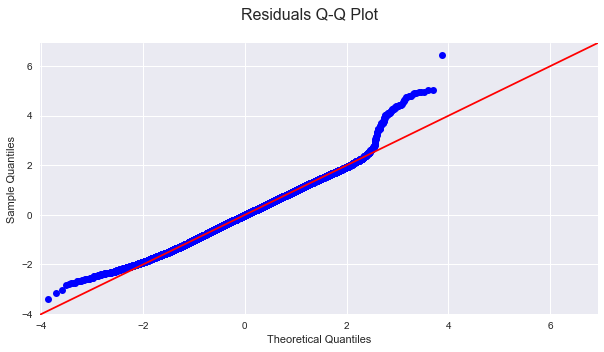

In [71]:
# qq plot
residuals = model4.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

In [72]:
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(model4.resid)/ len(model4.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

The mean of the residuals is 1.293e-13


## Model 5

In [73]:
# remove variables with a negative coefficient or a P values over .05
outcome = 'price'
x_cols = ['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
          'sqft_living15', 'gr_8','gr_9', 'gr_10', 'gr_11', 'condit_2', 'condit_4', 
          'condit_5', 'class_middle', 'class_upper', 'interaction_dist']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model5 = smf.ols(formula=f, data=df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     4176.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:25:43   Log-Likelihood:                 5617.8
No. Observations:               18756   AIC:                        -1.120e+04
Df Residuals:                   18738   BIC:                        -1.106e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.4018      0.049    214.459      0.000      10.307      10.497
bedrooms            -0.0231      0.002    -10.630      0.000      -0.027      -0.019
sqft_living          0.1891      0.007     28.711      0.000       0.176       0.202
sqft_lot             0.0131      0.002      6.980      0.000       0.009       0.017
floors               0.0294      0.005      6.069      0.000       0.020       0.039
waterfront           0.0993      0.031      3.237      0.001       0.039       0.159
view                 0.0300      0.002     12.707      0.000       0.025       0.035
sqft_living15        0.0994      0.007     14.429      0.000       0.086       0.113
gr_8                 0.0725      0.004     20.324      0.000       0.065       0.079
gr_9                 0.1344      0.006     23.514      0.000       0.123       0.146
gr_10                0.1251      0.009     13.279      0.000       0.107       0.144
gr_11                0.1149      0.028      4.146      0.000       0.061       0.169
condit_2            -0.0653      0.016     -4.041      0.000      -0.097      -0.034
condit_4             0.0324      0.003     10.133      0.000       0.026       0.039
condit_5             0.0780      0.005     14.961      0.000       0.068       0.088
class_middle         0.4214      0.004    110.513      0.000       0.414       0.429
class_upper          0.7886      0.006    125.614      0.000       0.776       0.801
interaction_dist    -0.0002   3.41e-06    -56.518      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      536.824   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              778.234
Skew:                           0.304   Prob(JB):                    1.02e-169
Kurtosis:                       3.791   Cond. No.                     2.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-74-595093a3b697>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


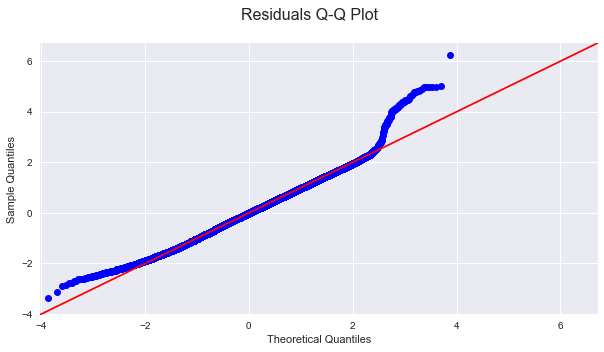

In [74]:
# qq plot
residuals = model5.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.savefig('finalmodel.png')
fig.show()

In [75]:
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(model5.resid)/ len(model5.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

The mean of the residuals is 6.963e-14


# Model Validation

In [76]:
# import libraries
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [77]:
# create test and training data subsets
X_train, X_test, y_train, y_test = train_test_split(df, df.price)
train, test = train_test_split(df,test_size=.25,shuffle=True)

In [78]:
df_train = pd.DataFrame(X_train, y_train)
df_test = pd.DataFrame(X_test, y_test)

In [79]:
# look at the shape of the subsets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(14067, 30) (14067,) (4689, 30) (4689,)


In [80]:
# look at the shape of the subsets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(14067, 30) (14067,) (4689, 30) (4689,)


In [81]:
# use the model to predict y values for the test and train data
y_pred_train = model4.predict(X_train)
y_pred_test = model4.predict(X_test)

In [82]:
train_mse = np.mean(y_train-y_pred_train)**2
test_mse = np.mean(y_test-y_pred_test)**2

train_r2 = r2_score(train['price'], model4.predict(train))
test_r2 = r2_score(test['price'], model4.predict(test))

print('Mean Squared Error Train:', train_mse)
print('Mean Squared Error Test:', test_mse)
print(f'R-Squared Train = {round(train_r2,2)}')
print(f'R-Squared Test = {round(test_r2,2)}')

Mean Squared Error Train: 1.689382907251564e-07
Mean Squared Error Test: 1.520444617802266e-06
R-Squared Train = 0.79
R-Squared Test = 0.8


In [84]:
# The MSE and R squared values for the train and test subsets are similar
# this suggests that the model will perform similarly on different data.

# Conclusions